In [395]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.io
import pandas as pd

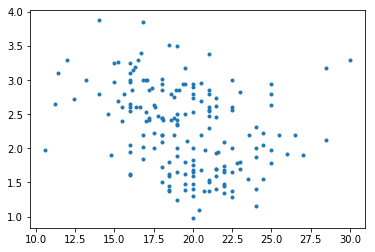

In [396]:
df = pd.read_csv('data.txt', sep=',', header=None)
first = 4
second = 6
count = len(df[0])
plt.plot(df[first], df[second], '.')
plt.show()

In [397]:
def len1(i, j): #Manhattan distance
    a = abs(df[first][i] - df[first][j])
    b = abs(df[second][i] - df[second][j])
    return a+b

In [398]:
def len2(i, j): #Euclidean distance
    a = (df[first][i] - df[first][j])*(df[first][i] - df[first][j])
    b = (df[second][i] - df[second][j])*(df[second][i] - df[second][j])
    return math.sqrt(a+b)

In [399]:
def lenglst(dot, l):
    lst = []
    for i in range(count):
        if i == dot:
            lst.append(-1)
        elif color[i] == 0:
            lst.append(-1)
        elif l == 1:
            lst.append(len1(dot, i))
        elif l == 2:
            lst.append(len2(dot, i))
    return lst    

In [400]:
def findNeighb(dot, lst):
    neighb = []
    for i in range(count):
        if lst[i] > 0:
            if len(neighb) < k:
                neighb.append(i)
            else:
                j = 0
                while (j < k) and (lst[neighb[j]] < lst[i]): j = j + 1
                if j < k:
                    neighb.insert(j, i)
                    neighb.pop()
    return neighb

In [403]:
color = count*[0]
classcount = 3
classstart = []
for i in range(classcount):
    classstart.append(random.randint(0,count))
    color[classstart[i]] = i + 1
k = classcount


In [406]:
def kNN(l):
    for i in range(count):
        if color[i] == 0:
            lst = lenglst(i,l)
            neighb = findNeighb(i, lst)
            defclass = classcount*[0]
            for j in range(k):
                cl = color[neighb[j]] - 1
                defclass[cl] = defclass[cl] + 1/lst[neighb[j]]
            cl = 1
            for j in range(classcount): 
                if defclass[cl-1] < defclass[j]:
                    cl = j+1
            color[i] = cl


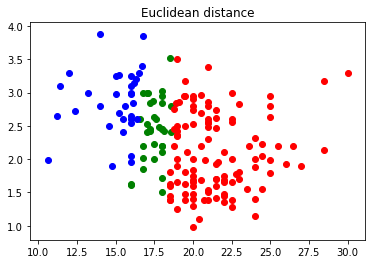

In [407]:
kNN(2)
plt.title("Euclidean distance")
for i in range(count):
    if color[i] == 1:
        plt.scatter(df[first][i], df[second][i], color = 'red')
    elif color[i] == 2:
        plt.scatter(df[first][i], df[second][i], color = 'blue')
    elif color[i] == 3:
        plt.scatter(df[first][i], df[second][i], color = 'green')

In [411]:
color = count*[0]
for i in range(classcount):
    color[classstart[i]] = i + 1


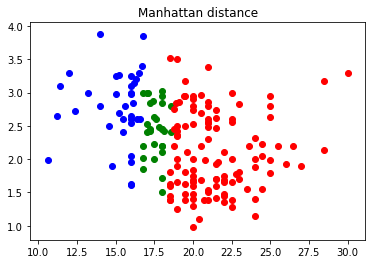

In [412]:
kNN(1)
plt.title("Manhattan distance")
for i in range(count):
    if color[i] == 1:
        plt.scatter(df[first][i], df[second][i], color = 'red')
    elif color[i] == 2:
        plt.scatter(df[first][i], df[second][i], color = 'blue')
    elif color[i] == 3:
        plt.scatter(df[first][i], df[second][i], color = 'green')